In [1]:
import pandas as pd
import pandas.tseries
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
by_year_df = pd.read_excel('Data/Total_immigration_by_year.xlsx') 
by_year_df.set_index('Year', inplace = True) #set index as year
by_year_df.index= by_year_df.index.astype(str) #change to str for date time format
by_year_df.index = pd.to_datetime(by_year_df.index)#, format='%d/%m/%y') #convert index to correct date time for future slicing
total_immigration = by_year_df['1820-01-01':]
total_immigration.head()

,Number
Year,
1820-01-01,8385
1821-01-01,9127
1822-01-01,6911
1823-01-01,6354
1824-01-01,7912


# Initial Plot of Immigration 1820 - 2017
## World Wars Highlighted and October 29, 1929 (start of GD) Shown

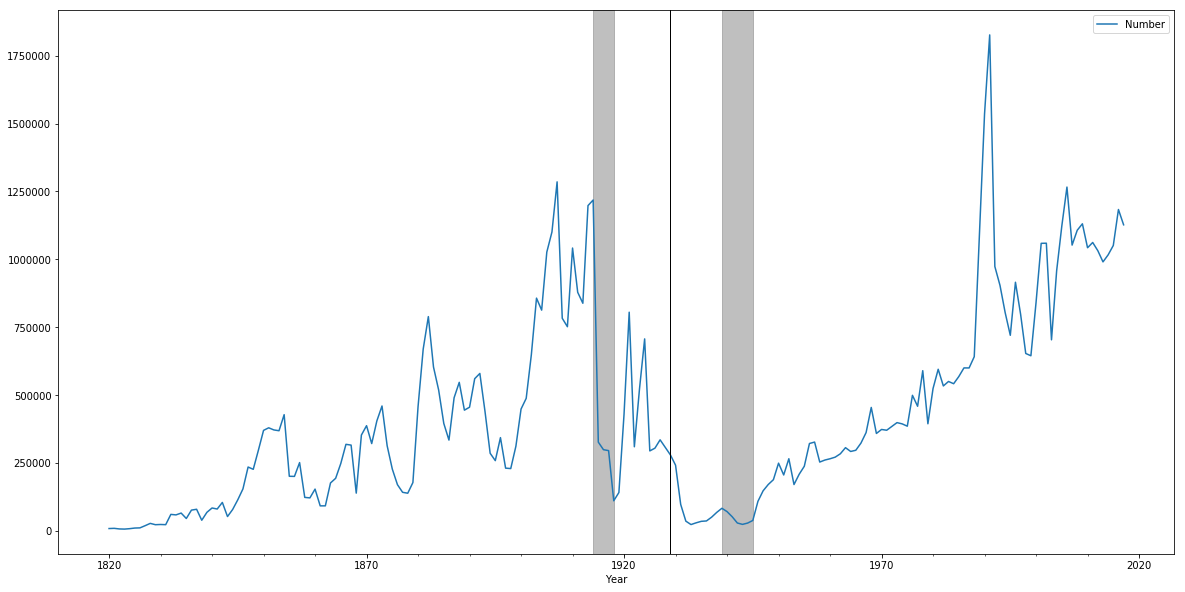

In [3]:
total_immigration.plot(figsize = (20,10))
plt.axvline(pd.to_datetime('1929-10-29'), color='black', linestyle='-', lw=1)

plt.axvspan(pd.to_datetime('1939-09-01'), pd.to_datetime('1945-09-01'), alpha=0.5, color='grey')
plt.axvspan(pd.to_datetime('1914-07-28'), pd.to_datetime('1918-11-11'), alpha=0.5, color='grey')

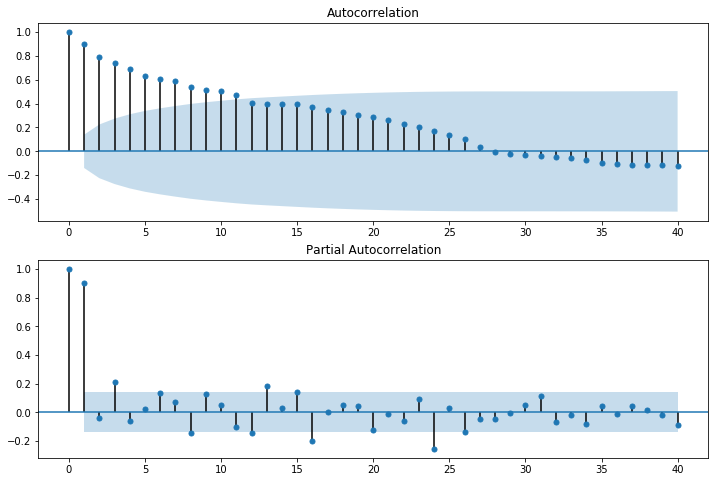

In [4]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(total_immigration, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(total_immigration, lags=40, ax=ax2)

# Decomposition

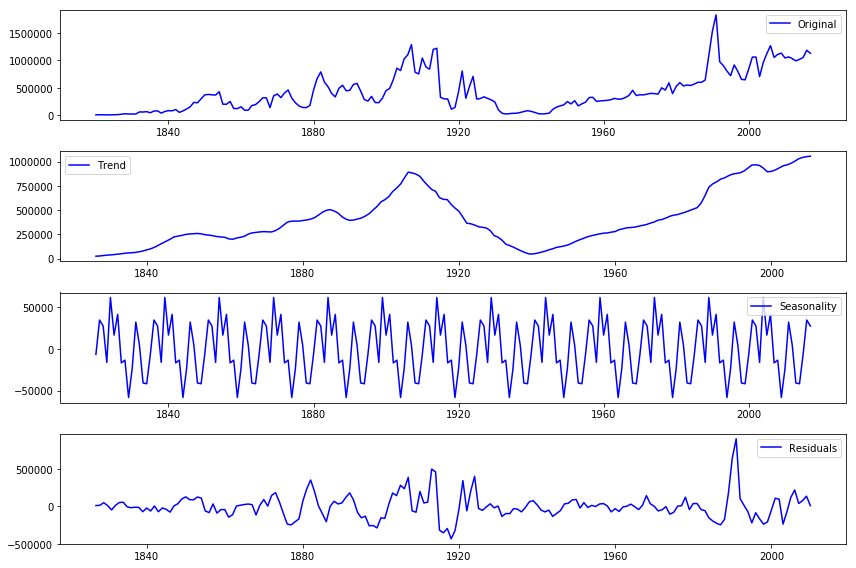

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(total_immigration, freq = 15)  
# decomposition.plot()
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(total_immigration, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

## Function to check for Stationarity and Graph
### - Rolling Mean and SD with window = 32
### - Plot results of DF Test

In [6]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 32, center = False).mean()
    rolstd = TS.rolling(window = 32, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['Number']) 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput2 = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput2['Critical Value (%s)'%key] = value
    print (dfoutput2)

# Log transformation
### Results of Dickey-Fuller Test:
- Test Statistic                  2.682961          
### p-value                           0.077033
- #Lags Used                      7.000000
- Number of Observations Used    190.000000
- Critical Value (1%)             -3.465244
- Critical Value (5%)             -2.876875
- Critical Value (10%)            -2.574945

In [7]:
import numpy as np
index = total_immigration.index

In [8]:
type(total_immigration)

pandas.core.frame.DataFrame

In [9]:
test = total_immigration.Number
type(test)

pandas.core.series.Series

In [10]:
immigration_array = test.as_matrix() #convert to numpy array
# immigration_array

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [11]:
data = pd.Series(np.log(immigration_array), index=index)
# data

Text(0, 0.5, 'log(Total_immigration_by_year)')

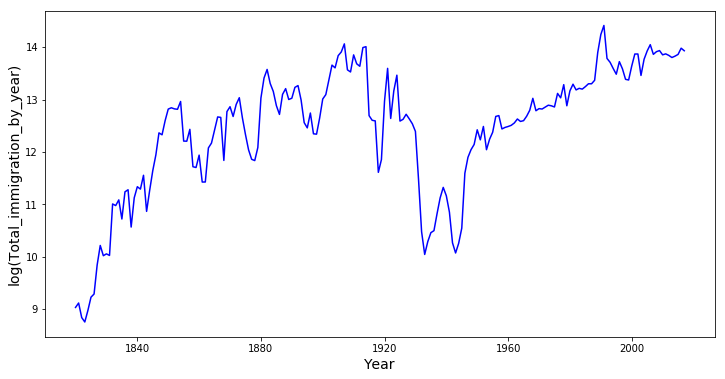

In [12]:
fig = plt.figure(figsize=(12,6))
plt.plot(data, color="blue")
plt.xlabel("Year", fontsize=14)
plt.ylabel("log(Total_immigration_by_year)", fontsize=14)
# plt.show()

In [13]:
data_df = data.to_frame()
data_df = data_df.rename(index=str, columns={0:'Number'})
# data_df

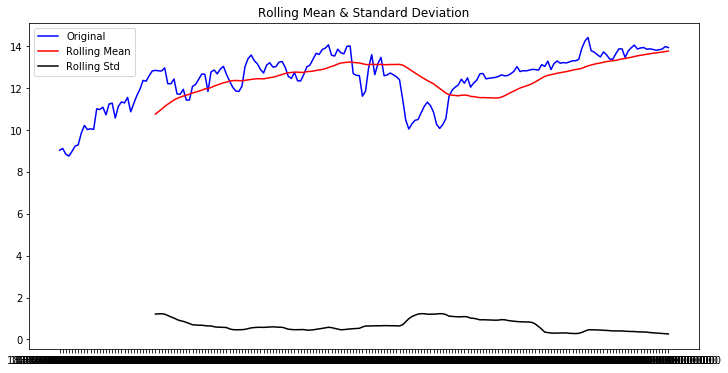

Results of Dickey-Fuller Test:
Test Statistic                  -2.682961
p-value                          0.077033
#Lags Used                       7.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


In [14]:
stationarity_check(data_df)

# Decomposition on Log Transformation of data

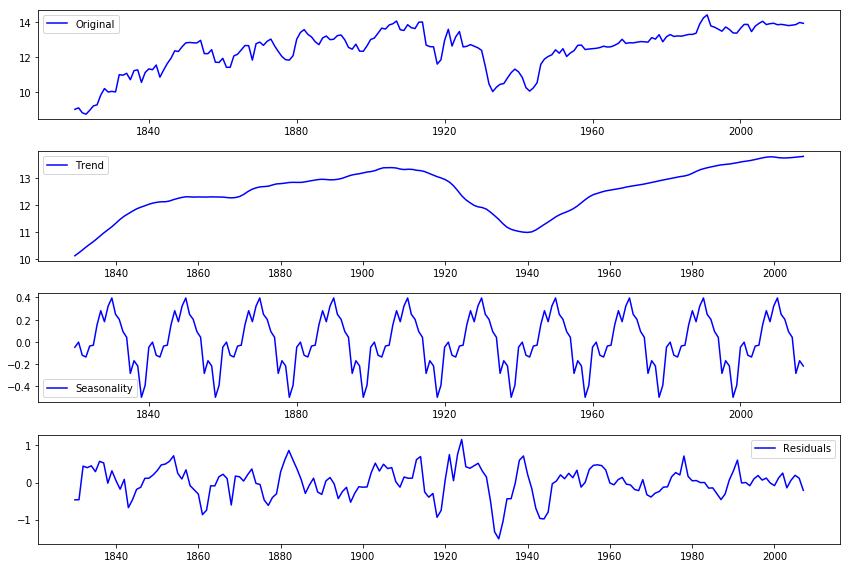

In [36]:
# from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_log = seasonal_decompose(data, freq = 20)  

trend = decomposition_log.trend
seasonal = decomposition_log.seasonal
residual = decomposition_log.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(data, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [37]:
#created a function to quickly process ts for stationarity check function
def clean_for_stat_check(ts):
    ts_df = ts.to_frame()
    ts_df = ts_df.rename(index=str, columns={0:'Number'})
    return ts_df

# Model residuals:

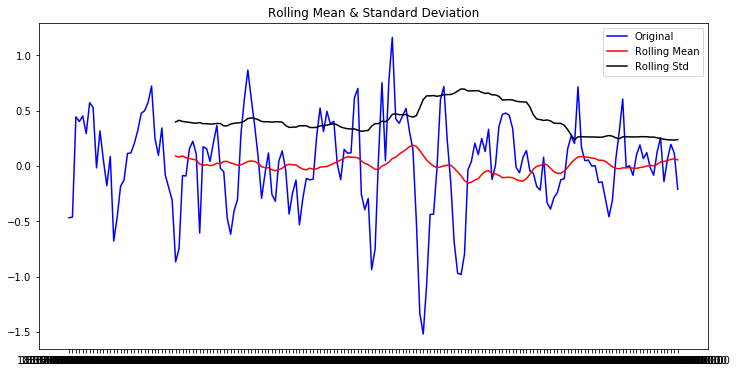

Results of Dickey-Fuller Test:
Test Statistic                -5.716613e+00
p-value                        7.096867e-07
#Lags Used                     7.000000e+00
Number of Observations Used    1.700000e+02
Critical Value (1%)           -3.469413e+00
Critical Value (5%)           -2.878696e+00
Critical Value (10%)          -2.575917e+00
dtype: float64


In [38]:

# Drop NaN values from residuals.
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(clean_for_stat_check(ts_log_decompose))

The Dickey-Fuller test statistic is significant and very well below a (strict) 0.01 mark. So it seems reasonable to assume this time series is stationary.

# 5. Subtracting the rolling mean

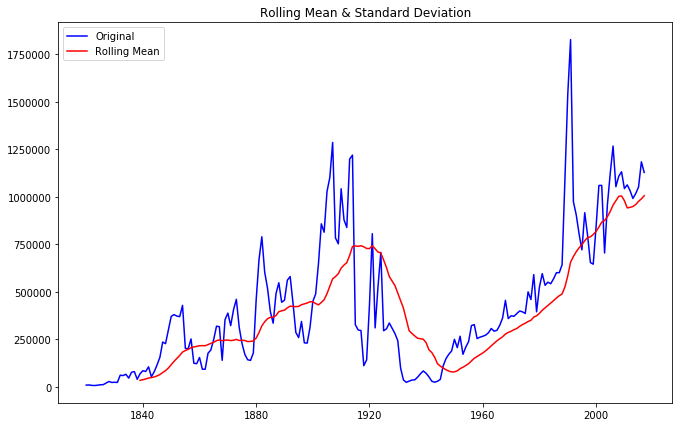

In [17]:
rolmean = total_immigration.rolling(window = 20).mean()
fig = plt.figure(figsize=(11,7))
orig = plt.plot(total_immigration, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [18]:
data_minus_rolmean = total_immigration - rolmean
# data_minus_rolmean.head(15)

In [19]:
data_minus_rolmean.dropna(inplace=True)

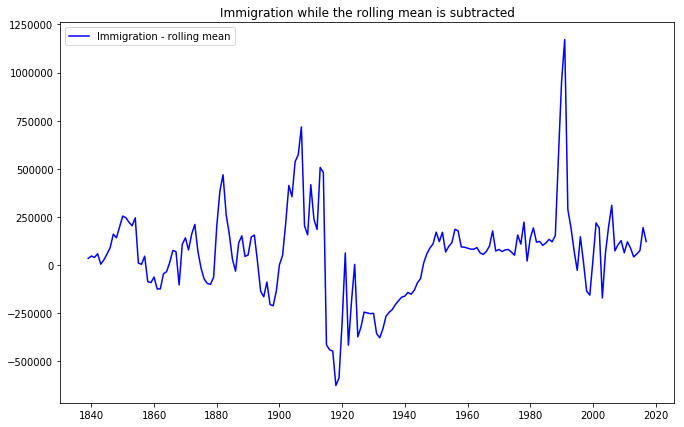

In [20]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolmean, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Immigration while the rolling mean is subtracted')
plt.show(block=False)

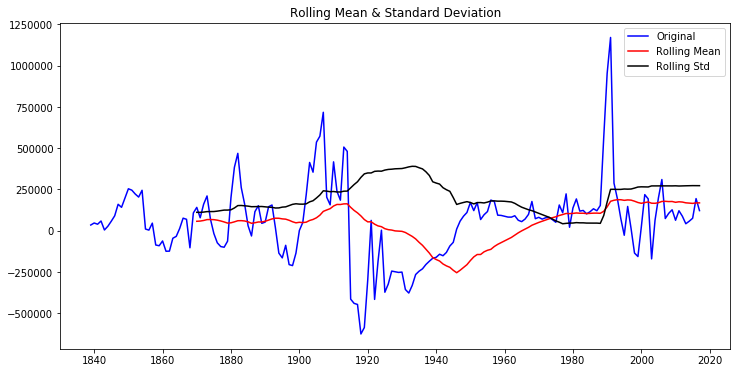

Results of Dickey-Fuller Test:
Test Statistic                  -2.916354
p-value                          0.043479
#Lags Used                      12.000000
Number of Observations Used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


In [21]:
stationarity_check(data_minus_rolmean)

# 6. The weighted rolling mean / weighted moving average
- More recent values are given a higher weight
- Below using Exponentially Weighted Moving Average where weights are assigned to all the previous values with an exponential decay factor
    - the parameter ‘halflife’ is used to define the amount of exponential decay. 
    - Other parameters like span and center of mass can also be used to define decay
    - more info: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html

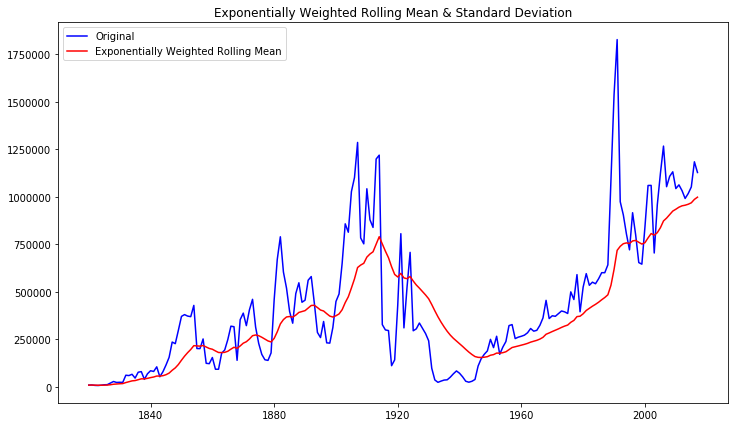

In [22]:
exp_rolmean = total_immigration.ewm(halflife = 8).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(total_immigration, color='blue',label='Original')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

# 7. Subtract the Exponentially Weighted Moving Average from the Original Data

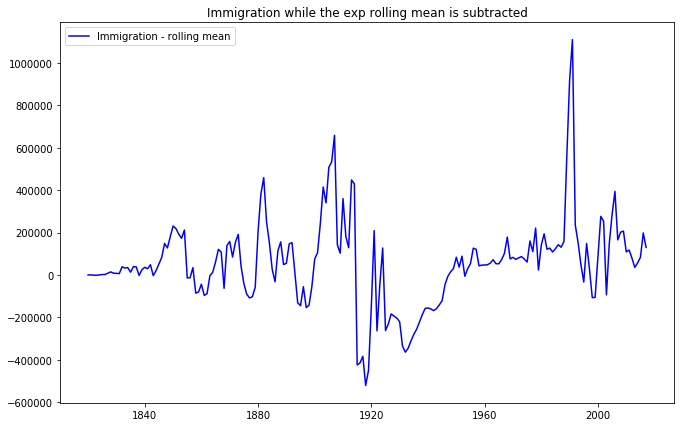

In [23]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_rolmean = total_immigration - exp_rolmean
data_minus_exp_rolmean.head(15)

fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_rolmean, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Immigration while the exp rolling mean is subtracted')
plt.show(block=False)

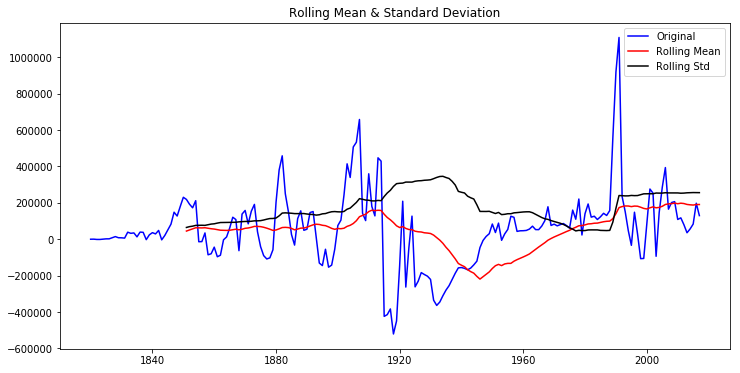

Results of Dickey-Fuller Test:
Test Statistic                  -2.385038
p-value                          0.146004
#Lags Used                      15.000000
Number of Observations Used    182.000000
Critical Value (1%)             -3.466800
Critical Value (5%)             -2.877555
Critical Value (10%)            -2.575308
dtype: float64


In [24]:
stationarity_check(data_minus_exp_rolmean)

# Differencing
- deal with both trend and seasonality 
- take the difference of an observation at a particular time instant with that at the previous instant (i.e. a co-called 1-period "lag")
## Question to research:
- How do you when you've differenced enough?

# 8.Use the new data where exp rolling mean is subtracted and difference it by 20 periods

In [107]:
#twelve period lag
data_diff = data_minus_exp_rolmean.diff(periods=20)
data_diff.index

DatetimeIndex(['1820-01-01', '1821-01-01', '1822-01-01', '1823-01-01',
               '1824-01-01', '1825-01-01', '1826-01-01', '1827-01-01',
               '1828-01-01', '1829-01-01',
               ...
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Year', length=198, freq=None)

In [108]:
data_diff.notnull().sum()

Number    178
dtype: int64

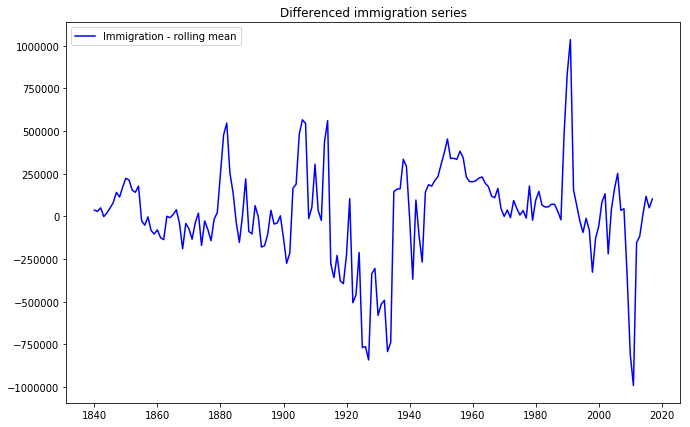

In [109]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Differenced immigration series')
plt.show(block=False)

In [110]:
data_diff.index

DatetimeIndex(['1820-01-01', '1821-01-01', '1822-01-01', '1823-01-01',
               '1824-01-01', '1825-01-01', '1826-01-01', '1827-01-01',
               '1828-01-01', '1829-01-01',
               ...
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Year', length=198, freq=None)

In [111]:
data_droppedna= data_diff.dropna()
data_droppedna

,Number
Year,
1840-01-01,3.616410e+04
1841-01-01,2.887483e+04
1842-01-01,4.955038e+04
1843-01-01,-2.104183e+03
1844-01-01,2.039563e+04
1845-01-01,4.915150e+04
1846-01-01,8.066422e+04
1847-01-01,1.399969e+05
1848-01-01,1.130066e+05


In [112]:
# data_droppedna#

In [114]:
# data_diff = data_droppedna.to_frame()
data_diff = data_droppedna.rename(index=str, columns={0:'Number'})
data_diff.index = pd.to_datetime(data_diff.index)

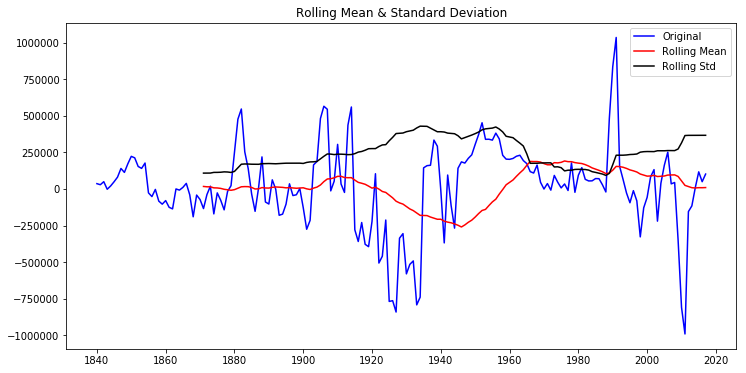

Results of Dickey-Fuller Test:
Test Statistic                  -3.240966
p-value                          0.017733
#Lags Used                       7.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


In [116]:
stationarity_check(data_diff)

In [115]:
data_diff.index

DatetimeIndex(['1840-01-01', '1841-01-01', '1842-01-01', '1843-01-01',
               '1844-01-01', '1845-01-01', '1846-01-01', '1847-01-01',
               '1848-01-01', '1849-01-01',
               ...
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Year', length=178, freq=None)

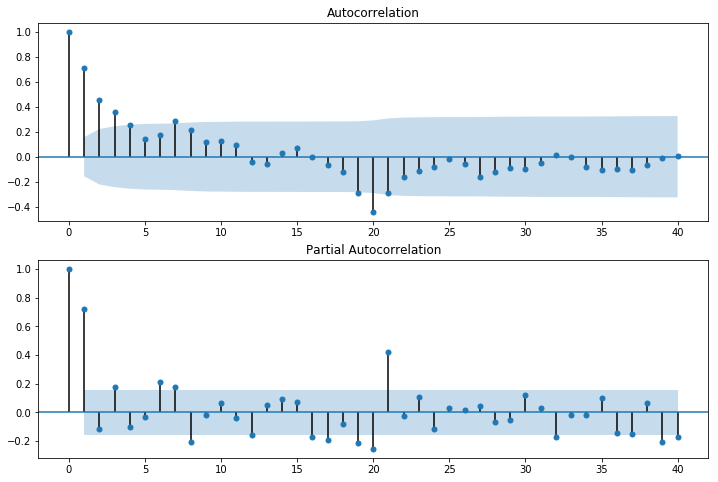

In [59]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_diff.iloc[21:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_diff.iloc[21:], lags=40, ax=ax2)

In [62]:
mod = sm.tsa.statespace.SARIMAX(data_diff, trend='n', order=(0,1,0), seasonal_order=(1,1,1,20))
results = mod.fit()
results.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                             Number   No. Observations:                  178
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 20)   Log Likelihood               -2160.166
Date:                            Tue, 22 Jan 2019   AIC                           4326.332
Time:                                    15:26:56   BIC                           4335.500
Sample:                                01-01-1840   HQIC                          4330.055
                                     - 01-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L20      -0.6311      0.081     -7.833      0.000      -0.789      -0.473
ma.S.L20      -0.7917      0.151     -5.255      0.000      -1.087      -0.496
sigma2       7.37e+10   2.11e-12   3.49e+22      0.000    7.37e+10    7.37e+10
===================================================================================
Ljung-Box (Q):                      114.56   Jarque-Bera (JB):                95.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.20   Skew:                            -0.61
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+38. Standard errors may be unstable.
"""

In [63]:
len(data_diff)

178

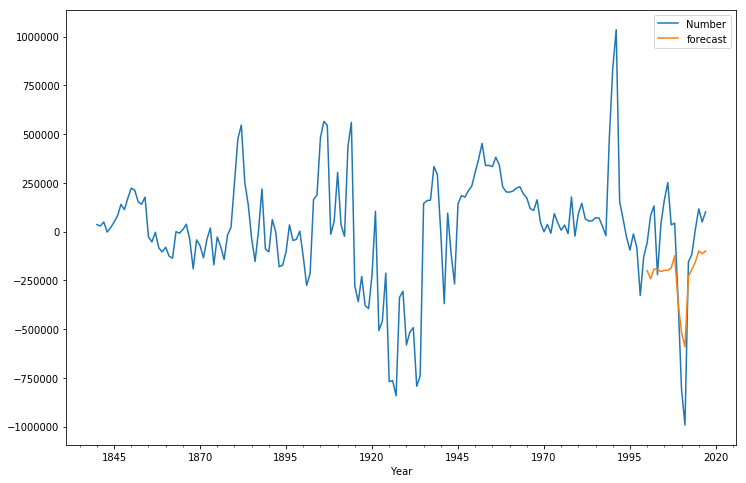

In [123]:
data_diff['forecast'] = results.predict(start = 160, end=300, dynamic= True)  
data_diff[['Number', 'forecast']].plot(figsize=(12, 8))

# 9. Use the data where rolling mean is subtracted and difference it by 20 periods

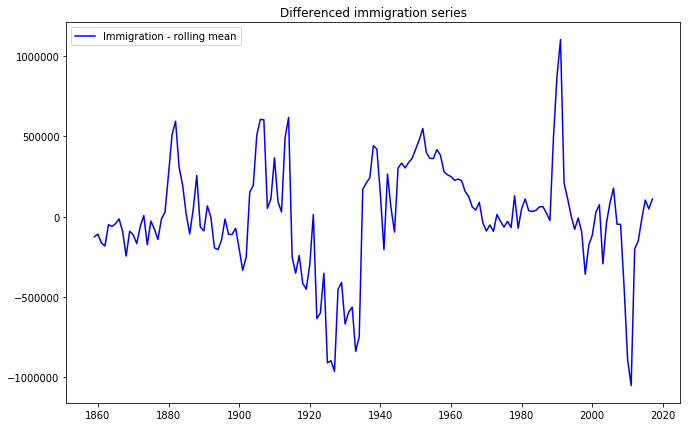

In [32]:

data_diff2 = data_minus_rolmean.diff(periods=20)
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff2, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Differenced immigration series')
plt.show(block=False)


In [33]:
data_droppedna2= data_diff2.dropna()

In [34]:
data_diff2 = data_droppedna2.rename(index=str, columns={0:'Number'})
# data_diff

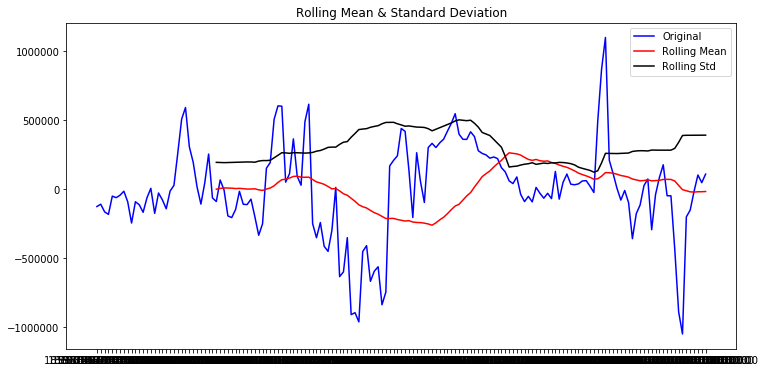

Results of Dickey-Fuller Test:
Test Statistic                  -3.107880
p-value                          0.025976
#Lags Used                       7.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64


In [35]:
stationarity_check(data_diff2)

In [ ]:
0.017733